In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
def plot_sample(index):
    plt.figure(figsize = (10, 1))
    plt.imshow(X_train[index])

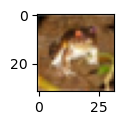

In [8]:
plot_sample(0)

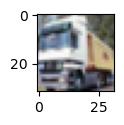

In [9]:
plot_sample(1)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
classes[y_train[0][0]]

'frog'

In [12]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [13]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)

y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
with tf.device('/GPU:0'):
    model.fit(X_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6208 - accuracy: 0.4291
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5409 - accuracy: 0.4576
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4813 - accuracy: 0.4789
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4346 - accuracy: 0.4953
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3893 - accuracy: 0.5109
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3492 - accuracy: 0.5245
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3158 - accuracy: 0.5401
Epoch 8/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2844 - accuracy: 0.5517
Epoch 9/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2508 - accuracy: 0.5608
Epoch 10/50
1563/1563 [==============================] - 11s 7ms/step - l

In [26]:
def predict(index):
    plt.figure(figsize = (10, 1))
    plt.imshow(X_test[index])
    print("Prediction: " + classes[np.argmax(model.predict(X_test_scaled)[index])])
    print("Target: " + classes[y_test[index][0]])

Prediction: cat
Target: cat


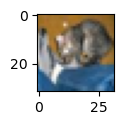

In [35]:
predict(0)

In [36]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 2s 6ms/step - loss: 1.7335 - accuracy: 0.5296


[1.733491063117981, 0.5296000242233276]